In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Loan-Approval-Prediction.csv")


In [2]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 8


In [4]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)


<ipython-input-9-213e279614b0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette=[color])  # Apply a unique color to each plot
<ipython-input-9-213e279614b0>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(y.index), y=y, palette=[color])  # Apply a unique color to each plot
<ipython-input-9-213e279614b0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette=[color])  # Apply a unique color to each plot
<ipython-input-9-213e279614b0>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may pro

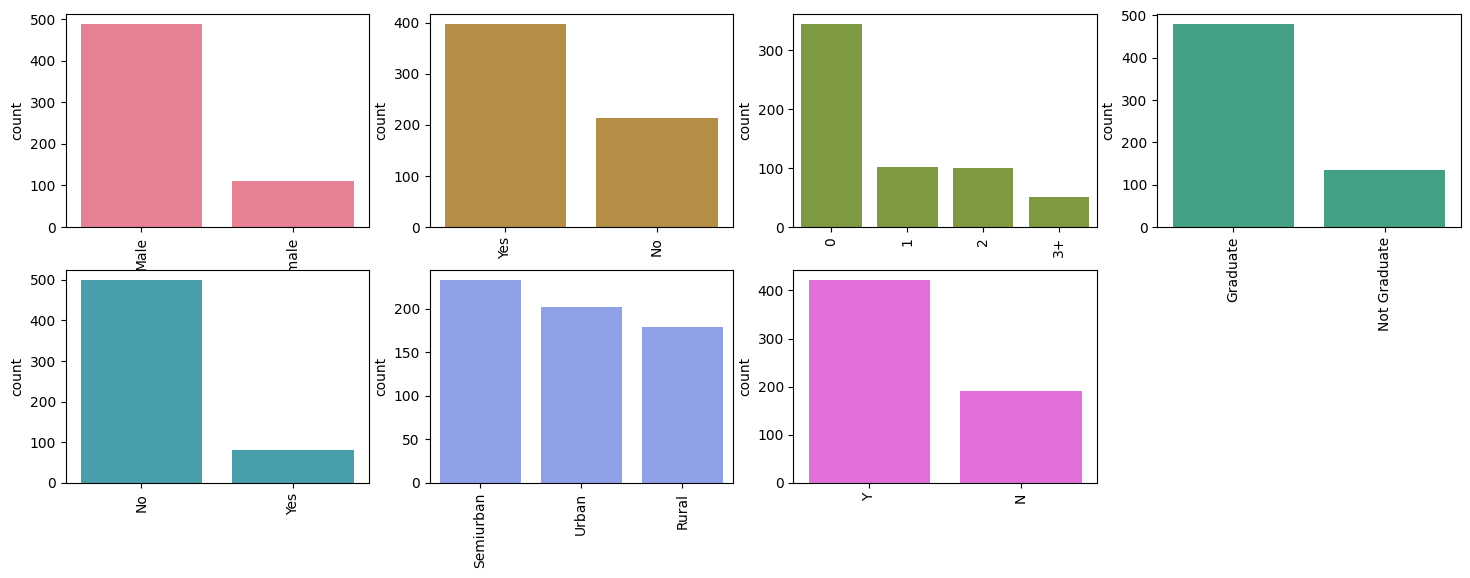

In [9]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
colors = sns.color_palette("husl", len(object_cols))  # Generate a color palette with different colors
for col, color in zip(object_cols, colors):
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, palette=[color])  # Apply a unique color to each plot
    index=index+1


In [10]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


In [11]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

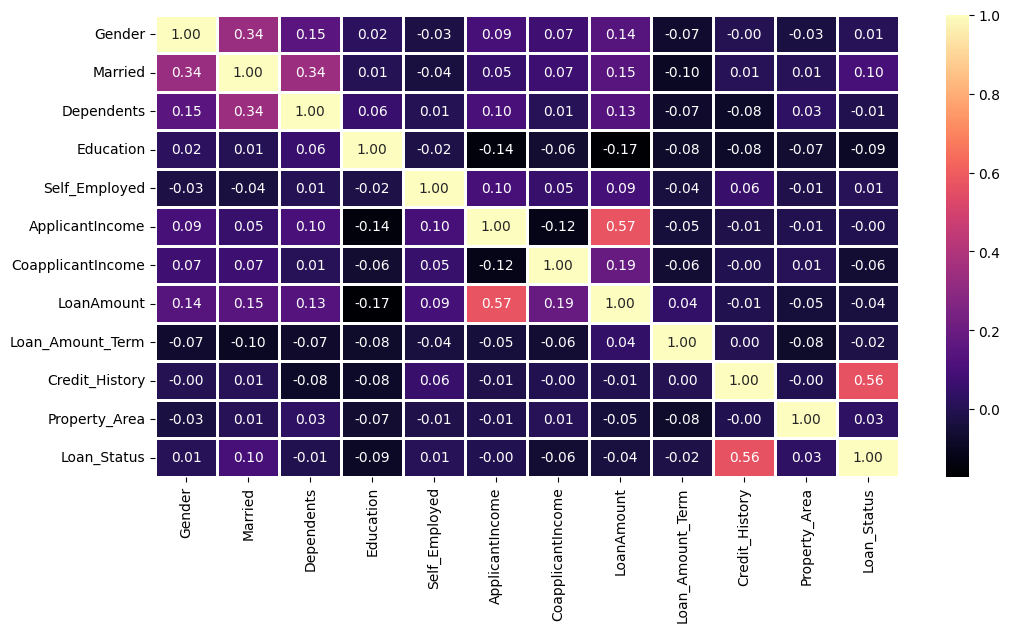

In [15]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='magma',fmt='.2f',
            linewidths=2,annot=True)


<ipython-input-17-a5ffbe66698c>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.catplot(x="Gender", y="Married",hue="Loan_Status",kind="bar",data=data,color="purple")


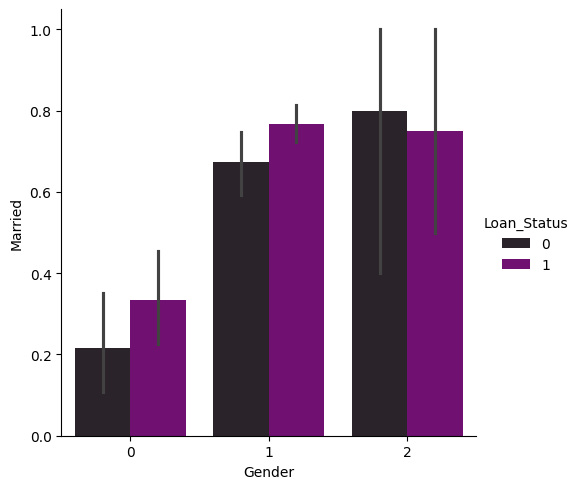

In [17]:
sns.catplot(x="Gender", y="Married",hue="Loan_Status",kind="bar",data=data,color="purple")


In [18]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((368, 11), (246, 11), (368,), (246,))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7)
svc = SVC()
lc = LogisticRegression()
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_train, Y_pred))


Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  SVC = 70.38043478260869
Accuracy score of  LogisticRegression = 82.88043478260869


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred))


Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 34  47]
 [  6 159]]


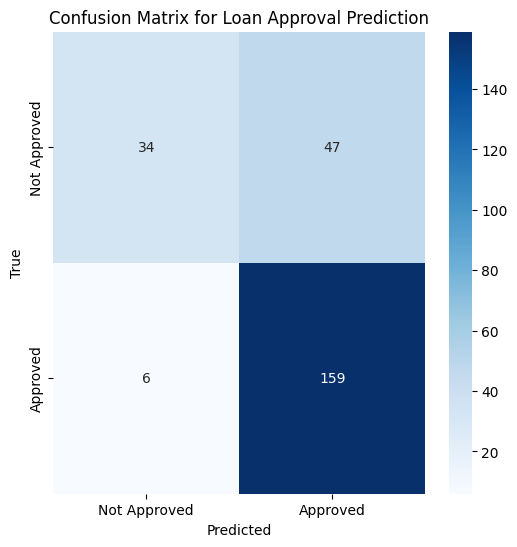

              precision    recall  f1-score   support

           0       0.85      0.42      0.56        81
           1       0.77      0.96      0.86       165

    accuracy                           0.78       246
   macro avg       0.81      0.69      0.71       246
weighted avg       0.80      0.78      0.76       246



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(X_train, Y_train)

# Predict on the test data
Y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix for Loan Approval Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(Y_test, Y_pred))



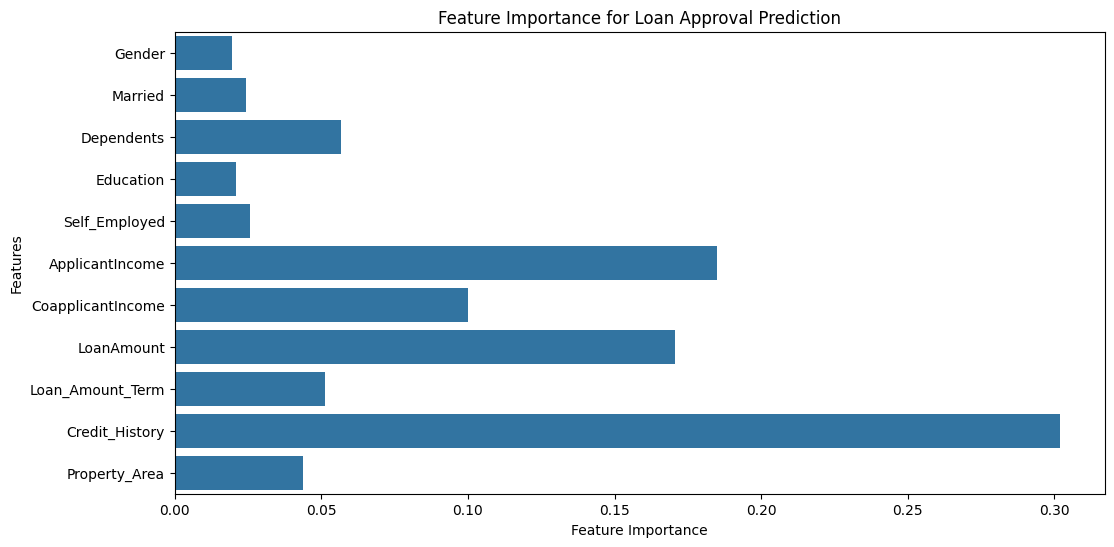

In [30]:
# Feature Importance
plt.figure(figsize=(12,6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Loan Approval Prediction')
plt.show()